In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline 


In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df=data.drop(['area_type','society','balcony','availability'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data cleaning 

In [6]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df1 = df.dropna()
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df1['BHK']=df1['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\msqur\AppData\Local\Temp\ipykernel_9176\490329464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BHK']=df1['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df1['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df1[df1.BHK>20]
# peux plosible possible d'avoir une maison de 43 pieces sur 2400 pied carre

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [14]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df1[-df1['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [16]:
def convert_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+ float(tokens[1])//2)
    try:
        return float(x)
    except:
        return None

In [17]:
df2 = df1.copy()
df2['total_sqft']=df2['total_sqft'].apply(convert_to_num)

In [18]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       3525.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

## Feature engineering

In [19]:
df3 = df2.copy()
df3['price_per_sqft'] = df2['price']*1000000/df2['total_sqft'] # roupis en $
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [20]:
len(df3['location'].unique())

1304

In [21]:
df3.location = df3.location.apply(lambda x : x.strip())
location_stat = df3.groupby('location')['location'].agg('count').sort_values(ascending=False) # c'est une series
print(location_stat)

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
adigondanhalli                 1
akshaya nagar t c palya        1
anjananager magdi road         1
arudi                          1
2Electronic City Phase II      1
Name: location, Length: 1293, dtype: int64


In [22]:
len(location_stat[location_stat<=10])

1052

In [23]:
location_stat_less_than_ten = location_stat[location_stat<=10]
location_stat_less_than_ten

location
Ganga Nagar                  10
Gunjur Palya                 10
BTM 1st Stage                10
Sadashiva Nagar              10
Kalkere                      10
                             ..
adigondanhalli                1
akshaya nagar t c palya       1
anjananager magdi road        1
arudi                         1
2Electronic City Phase II     1
Name: location, Length: 1052, dtype: int64

In [24]:
len(df3.location.unique())

1293

In [25]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stat_less_than_ten else x)
len(df3.location.unique())

242

## Outlier detection


In [26]:
df3[df3.total_sqft/df3.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [27]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]
df4.shape

(12502, 7)

In [28]:
df4.price_per_sqft.describe()

count    1.245600e+04
mean     6.290304e+04
std      4.175616e+04
min      2.678298e+03
25%      4.186726e+04
50%      5.281690e+04
75%      6.904652e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

In [29]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] >= (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [30]:
df5 = remove_pps_outliers(df4)
df5.shape

(10231, 7)

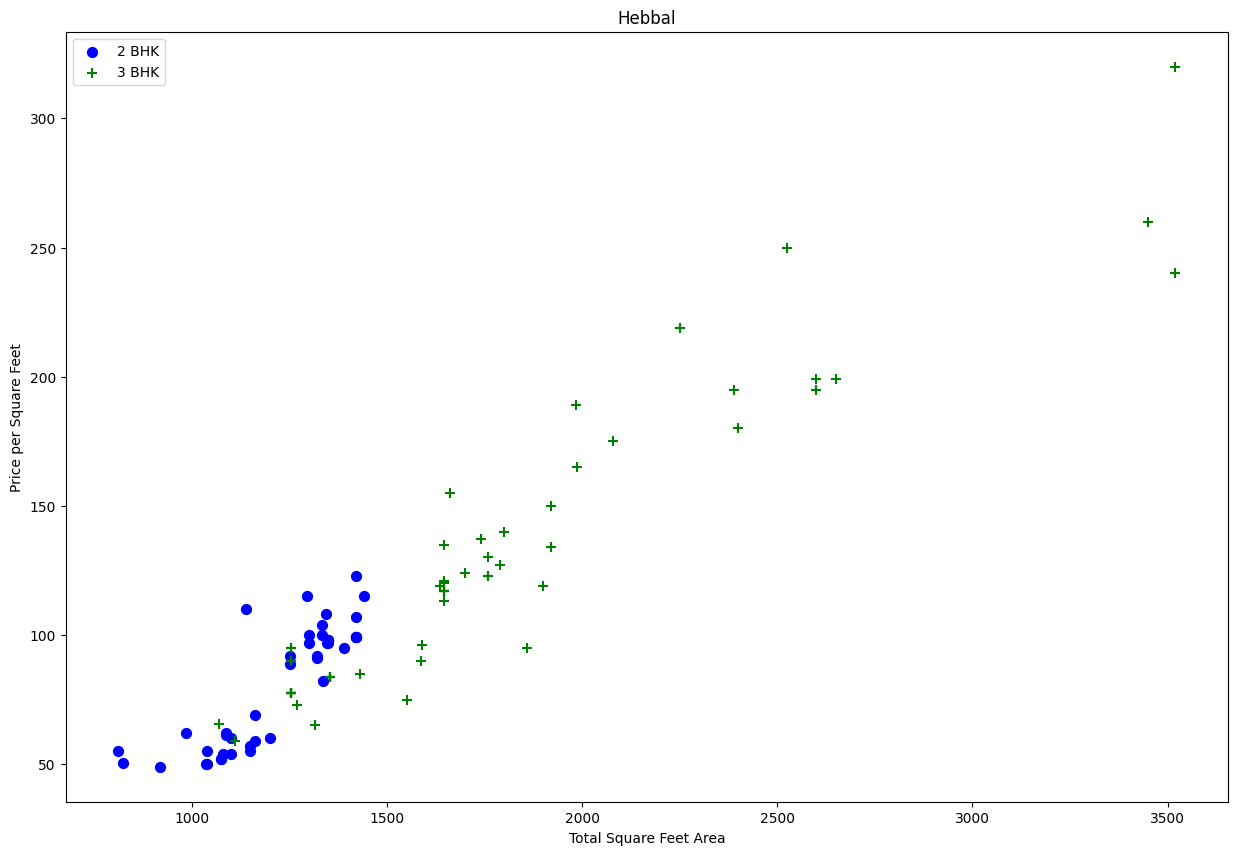

In [31]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df["location"]==location)&(df.BHK ==2)]
    bhk3 = df[(df["location"]==location)&(df.BHK ==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['total_sqft'],bhk2["price"],color='blue',label = '2 BHK',s=50)
    plt.scatter(bhk3["total_sqft"],bhk3["price"],marker='+',color='green',label = '3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df5,"Hebbal")

we should also remove properties where for the same location, the price of (for example) 3 bedrooms apartment is less than 2 bedroom apartment (with same sqft area). What we will do is for a giocven location, we will build a dictionary of stats per bhk.
{
    "1": {
        "mean": 4000,
        "std":  2000,
        "count": 34
    },
    "2": {
        "mean": 4300,
        "std":  2300,
        "count": 28
    }
}
Now we can remove those 2 BHK apartlents whose price_per_sqft is less tha, price_per_sqft of 1 bhk apartment

In [32]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([], dtype=int)
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices, 
                    bhk_df[bhk_df.price_per_sqft < stats['mean']].index
                )
    return df.drop(exclude_indices, axis='index')
df6 = remove_bhk_outlier(df5)
df6.shape

(7326, 7)

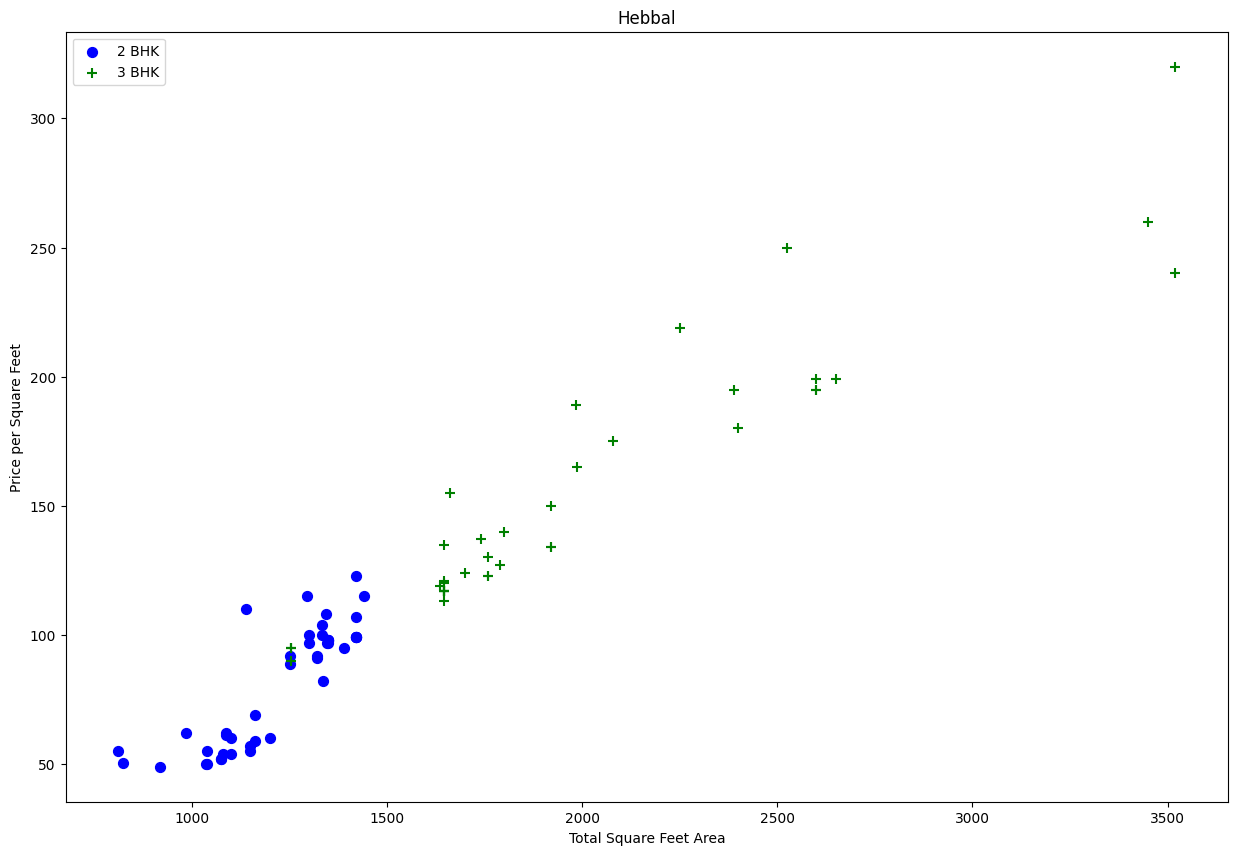

In [33]:
plot_scatter_chart(df6,"Hebbal")

Text(0, 0.5, 'count')

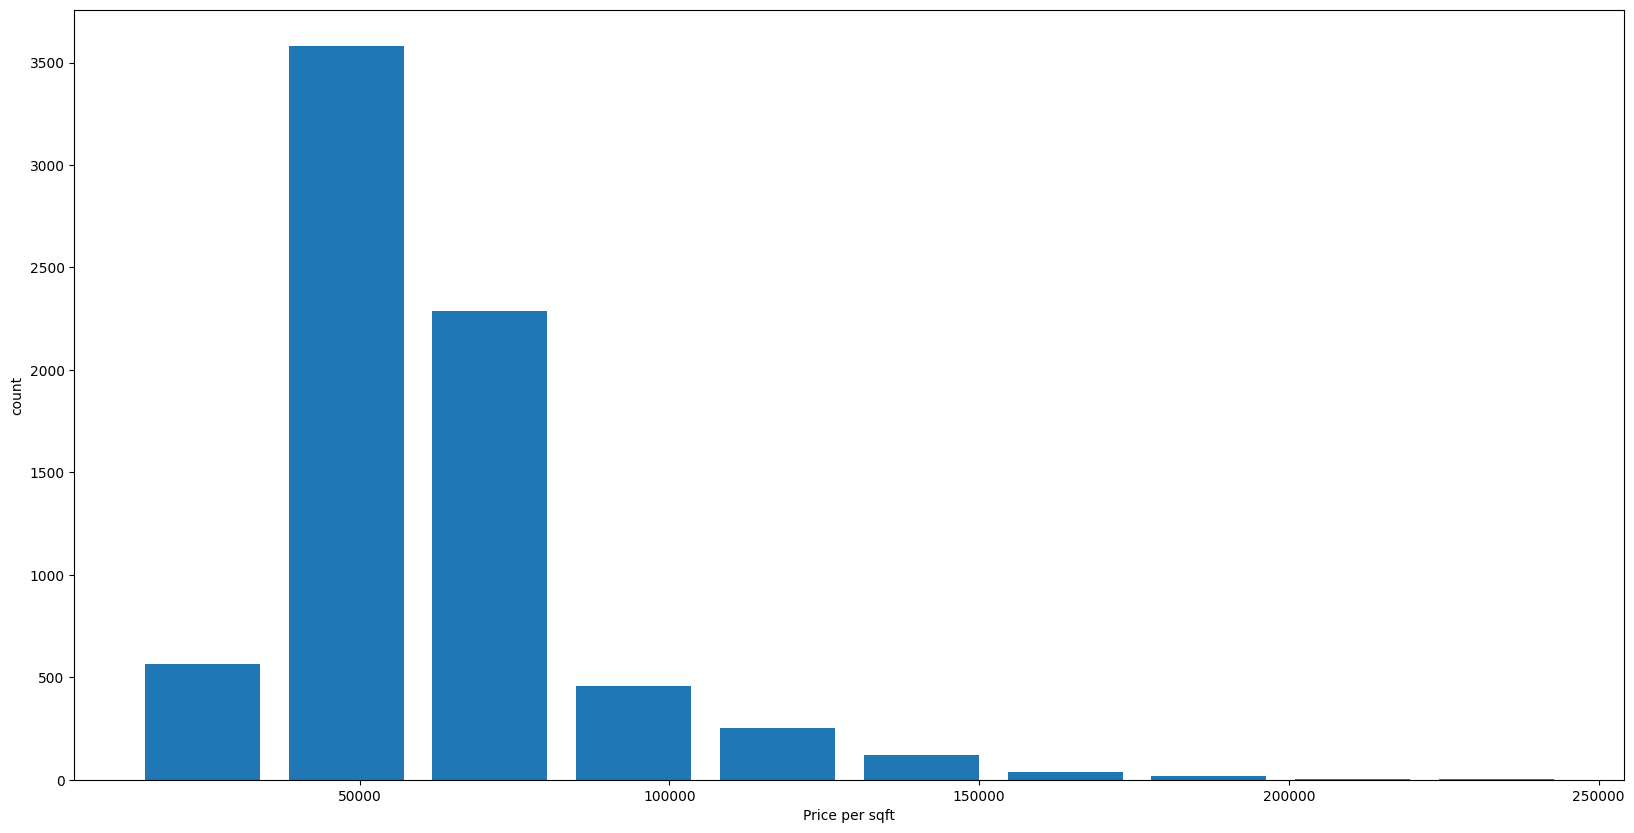

In [34]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("count")

In [35]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [36]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5273,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.00000
8476,other,10 BHK,12000.0,12.0,525.0,10,43750.00000
8565,other,16 BHK,10000.0,16.0,550.0,16,55000.00000
9298,other,11 BHK,6000.0,12.0,150.0,11,25000.00000
9629,other,13 BHK,5425.0,13.0,275.0,13,50691.24424


Text(0, 0.5, 'count')

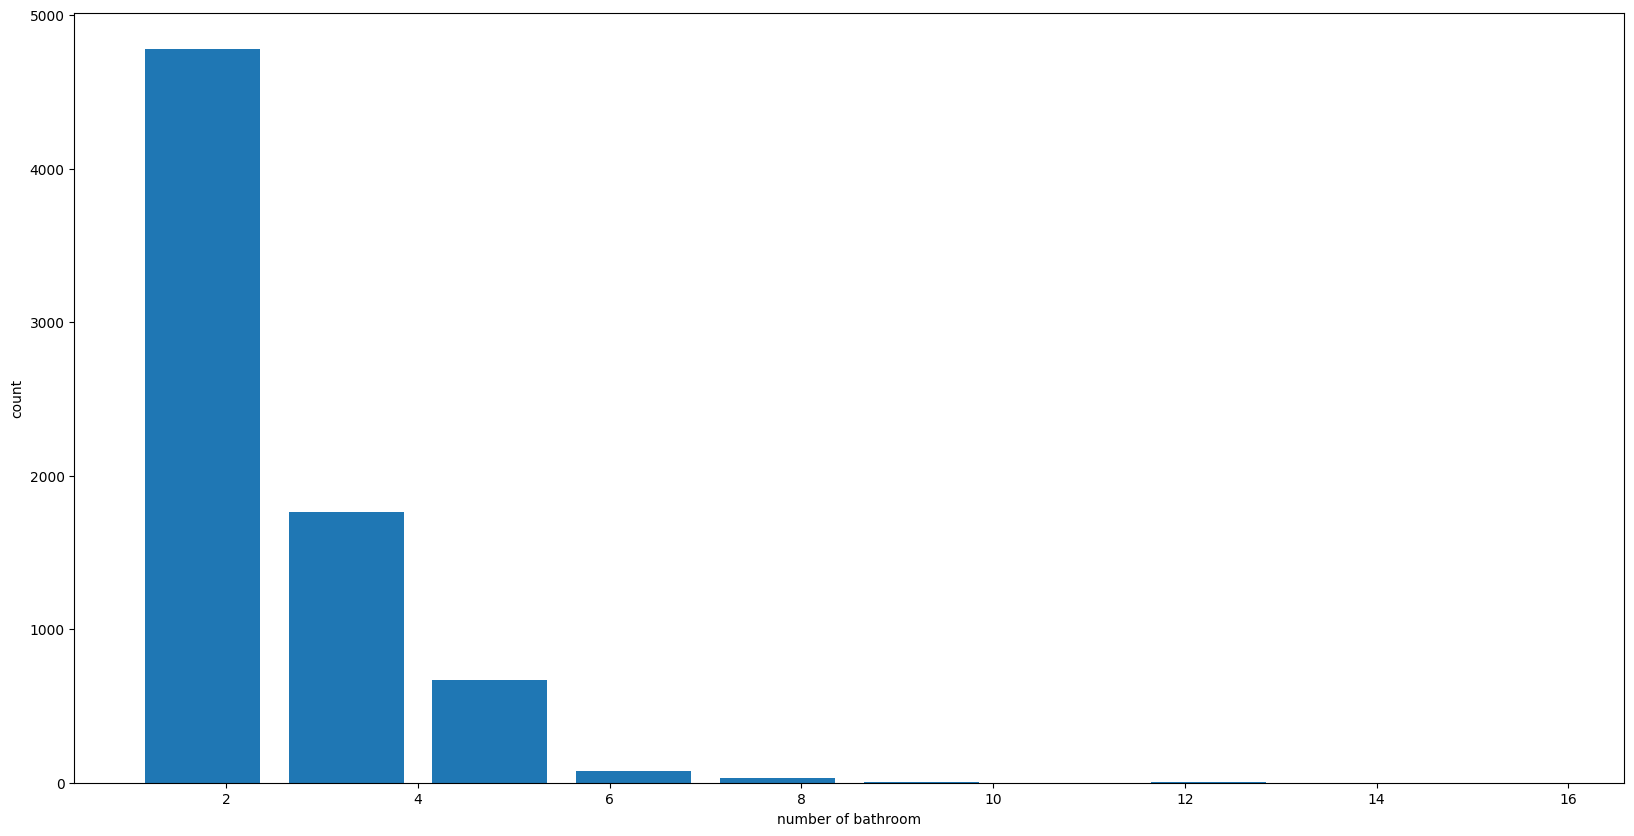

In [37]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("number of bathroom")
plt.ylabel('count')

In [38]:
df6[df6.bath> df6.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1625,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
5234,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
6705,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300
8401,other,6 BHK,11338.0,9.0,1000.0,6,88198.976892


In [39]:
df7 = df6[df6.bath<df6.BHK+2]
df7.shape

(7252, 7)

In [40]:
df8 = df7.drop(['price_per_sqft','size'],axis=1)
df8.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [41]:
# encodage de la colonne location
dummies = pd.get_dummies(df8.location) # marceh comme le OneHotEncoding de sklearn
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df9 = pd.concat([df8,dummies.drop('other',axis=1)],axis=1)
df9

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,other,1200.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10223,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10226,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10227,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df9.drop(['location'],axis=1,inplace=True)
df9

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,1200.0,2.0,70.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10223,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10226,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10227,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df9.shape

(7252, 245)

## Creation du modele

In [45]:
X = df9.drop(['price'],axis=1)
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
y = df9.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test) 

0.8341934552540773

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.83419346, 0.84066951, 0.85637368, 0.84326623, 0.84613176])

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos={
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True,False], 
                'fit_intercept':[True,False], 
                'n_jobs':[True,False], 
                'positive':[True,False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])
find_best_model(X,y)

c:\Users\msqur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\msqur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\msqur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

,model,best_score,best_params
0,linear_regression,0.844582,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,decision_tree,0.694592,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,lasso,0.717720,"{'alpha': 1, 'selection': 'cyclic'}"


#### Regression lineaire est le meilleur model

In [51]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr.predict([x])[0]

In [52]:
X.columns


Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [53]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

np.int64(5)

In [54]:
predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\msqur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(90.96959312651681)

In [55]:
predict_price('1st Phase JP Nagar',1000,3,3)

c:\Users\msqur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(95.75395380938832)

In [56]:
import pickle
with open('Bengaluru_home_price_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [59]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    json.dump(columns, f)
